## Twitter Sentiment
First, load the data into the workspace.

In [1]:
import pandas as pd
import psycopg2
import sys
sys.path.append("../listener")

import private

pd.set_option('display.max_colwidth', -1)

QUERY_GET_DATING_DATA = '''
select
    *,
    case
        when tweet_text ~ 'tinder' or tweet_full_text ~ 'tinder' then 'Tinder'
        when tweet_text ~ 'bumble' or tweet_full_text ~ 'bumble' then 'Bumble'
        when tweet_text ~ 'jswipe' or tweet_full_text ~ 'jswipe' then 'Jswipe'
        when tweet_text ~ 'coffee meets bagel' or tweet_full_text ~ 'coffee meets bagel' then 'Coffee Meets Bagel'
        else 'Unclassified'
end as platform_name
from twitter_sentiment.dating_apps;
'''

with psycopg2.connect(private.AWS_CONNECTION_STRING) as conn:
    df = pd.read_sql(
        sql = QUERY_GET_DATING_DATA,
        con = conn
    )

/Users/b/anaconda2/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Sentiment Analysis
Use the vader package to assign sentiment to each tweet.

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

print('Tinder: ' + str(analyser.polarity_scores("I love Tinder, so much fun!")))
print('Jswipe: ' + str(analyser.polarity_scores("All the best people are on Jswipe")))
print('Bumble: ' + str(analyser.polarity_scores("Are you F&%$ing kidding me??? Bumble is terrible!!!")))

Tinder: {'neg': 0.0, 'neu': 0.271, 'pos': 0.729, 'compound': 0.843}
Jswipe: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
Bumble: {'neg': 0.379, 'neu': 0.504, 'pos': 0.117, 'compound': -0.6269}


In [3]:
def get_sentiment(text):
    '''Take text, return positive sentiment score'''
    return analyser.polarity_scores(text)['compound']

df_clean = df[['tweet_created_at','tweet_text','tweet_full_text', 'platform_name']][df['tweet_language']=='en']
df_clean['sentiment_compound'] = df_clean['tweet_text'].apply(get_sentiment)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11061a5d0>]],
      dtype=object)

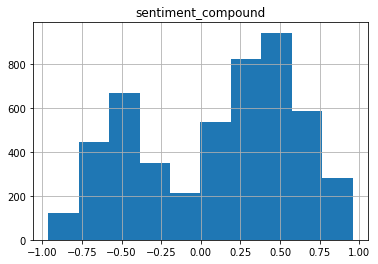

In [7]:
df_clean[df_clean['sentiment_compound'] != 0].hist()

In [5]:
(df_clean.
    sort_values(by = ['sentiment_compound'], ascending=False).
    head()[['tweet_text', 'sentiment_compound', 'platform_name']])

,tweet_text,sentiment_compound,platform_name
279,@thismommyrocksR @jaymohr37 @Tinder My heart is so happy! Congratulations wonderful you. You having an amazing soul… https://t.co/tKJscJXYU1,0.9582,Unclassified
11361,sex 2018 girls beautiful 1st ? Cartagena tinder Cute new mexico best sexual wanting lady Free 24/7 cheerful Online… https://t.co/SPDcZthrjv,0.9578,Tinder
12769,nude Beautiful Women relations Lover for free Eastern Match adult charm Sex free zwickau Dates Exclusive ? Illinois… https://t.co/R06IOcuLCI,0.9552,Unclassified
14174,"British people got the best slang and the best accent, reading it in the Brit way is amazing lmfao",0.9493,Unclassified
10942,real popular German nice Tinder moms Relation Beauty Fr hesse look for Love dating hookup Good sexual Uk sex girl H… https://t.co/aXoko2t0Kt,0.9477,Unclassified


In [6]:
(df_clean.
    sort_values(by = ['sentiment_compound'], ascending=True).
    head()[['tweet_text', 'sentiment_compound','platform_name']])

,tweet_text,sentiment_compound,platform_name
13034,RT @JennNdJuice: Dont never tell no bumble fuck ass bitch shit about her man. It ain’t shit you can say that her intuition ain’t already to…,-0.9621,Bumble
8002,Dont never tell no bumble fuck ass bitch shit about her man. It ain’t shit you can say that her intuition ain’t alr… https://t.co/cX67zsAEqZ,-0.9621,Bumble
10853,"RT @samanthakpaull: @aiyannaamb Why the fuck u bad bitches have tinder anyway, ur not a 53 year old Male with failing genetics and a sad qu…",-0.9538,Tinder
7898,i go on tinder when im depressed but it makes me even more depressed because men are ugly and gross 😔,-0.9451,Tinder
16909,RT @n_direct: Serial killer Deku and Serial killer Bkg meeting up using Tinder w/ plans to kill each other. Neither knows that the other is…,-0.9360,Unclassified
